# 🎓 Denetimsiz Öğrenme ve Önemli Algoritmalar

---

## 🧠 **Denetimsiz Öğrenme (Unsupervised Learning) Nedir?**

Denetimsiz öğrenme, **etiketlenmemiş verilerle** çalışan bir makine öğrenmesi yaklaşımıdır. Bu yöntem, verilerdeki gizli desenleri, yapıları ya da gruplamaları ortaya çıkarmayı amaçlar. Öğrenme sürecinde modelin elinde yalnızca **özellik (feature)** bilgisi vardır, herhangi bir "doğru cevap" etiketi (label) yoktur.

### 🎯 **Amaç:**
- Benzer özellikteki verileri **gruplamak**
- Verileri daha **anlamlı yapılarla temsil etmek**
- **Anomali** veya alışılmadık örnekleri ortaya çıkarmak
- Verinin **boyutunu azaltmak** ve anlamlandırmak

---

## 📊 Denetimsiz Öğrenmenin Kullanım Alanları
- **Müşteri segmentasyonu**
- **Anomali tespiti** (dolandırıcılık, üretim hataları)
- **Boyut indirgeme ve görselleştirme**
- **Veri keşfi ve önişleme**

---

# 🔍 6 Önemli Denetimsiz Öğrenme Algoritması

---

## 1️⃣ K-Means Clustering

### 🔧 **Tanım:**
Veri noktalarını **önceden belirlenen K sayıda kümeye** (cluster) ayıran, mesafeye dayalı bir kümeleme algoritmasıdır. Her küme, kendi merkezine (centroid) en yakın noktaları içerir.

### 🔢 Adımlar:
1. K küme merkezi (centroid) rastgele atanır.
2. Her veri noktası en yakın merkeze atanır.
3. Merkezler, kümeye ait noktaların ortalaması alınarak güncellenir.
4. Atamalar değişmeyene kadar tekrarlanır.

### ✅ Avantajları:
- Hızlı ve sezgisel
- Büyük veri setlerinde etkili

### ⚠️ Dezavantajları:
- K sayısı önceden bilinmeli
- Küme şekli dairesel değilse başarısı düşer
- Aykırı değerlerden etkilenebilir

### 📌 Kullanım Örneği:
- **Mall Customers Dataset** ile müşteri gruplama

---


### 🏬 **Verisetinin Hikayesi**

Bir alışveriş merkezi yönetimi, **müşteri kitlesini daha iyi tanımak** ve **hedefli pazarlama stratejileri geliştirmek** istiyor. Bu amaçla, sadık müşterilerinden topladıkları bazı temel demografik bilgileri ve harcama davranışlarını analiz etmek üzere bir veri tabanı oluşturuyorlar.

Veri, pazarlama ekibi tarafından oluşturulmuş ve müşteri profillerinin **segmentlere ayrılması (segmentation)** amacıyla kullanılmak üzere hazırlanmıştır.

---

### 📦 **Veride Neler Var?**

Verisetinde her satır bir müşteriyi temsil eder ve şu değişkenler yer alır:

| Değişken Adı           | Açıklama |
|------------------------|----------|
| `CustomerID`           | Müşteri numarası (benzersiz) |
| `Gender`               | Cinsiyet (Male/Female) |
| `Age`                  | Yaş |
| `Annual Income (k$)`   | Yıllık gelir (1000$ cinsinden) |
| `Spending Score (1-100)` | Harcama Skoru – alışveriş sıklığı, alışveriş tutarı ve müşteri davranışı baz alınarak 1-100 arasında verilen bir skor |

---

### 🎯 **Veri ile Ne Yapılır?**

Bu veri genellikle **müşteri segmentasyonu (Customer Segmentation)** amacıyla kullanılır. Yani benzer gelir ve harcama profiline sahip müşterilerin aynı grupta yer aldığı segmentler belirlenir. Bu sayede:

- Pazarlama kampanyaları kişiselleştirilebilir.
- Sadakat programları etkili hale getirilebilir.
- Hedef kitle analizleri daha doğru yapılabilir.

En çok kullanılan analiz teknikleri arasında:

- **K-Means Clustering** ile segmentasyon  
- **PCA** ile boyut indirgeme ve görselleştirme  
- **Scatter plot** ile segmentlerin görsel analizi  
- **Demografik analizler** ile yaş/cinsiyet/grup ilişkilerinin incelenmesi yer alır.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/KAIRU/Bootcampler/AI BOOTCAMP/bootcamp ders içerikleri/MAKİNE ÖĞRENMESİ/6_Denetimsiz Öğrenme/dataset/Mall_Customers 2.csv")
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


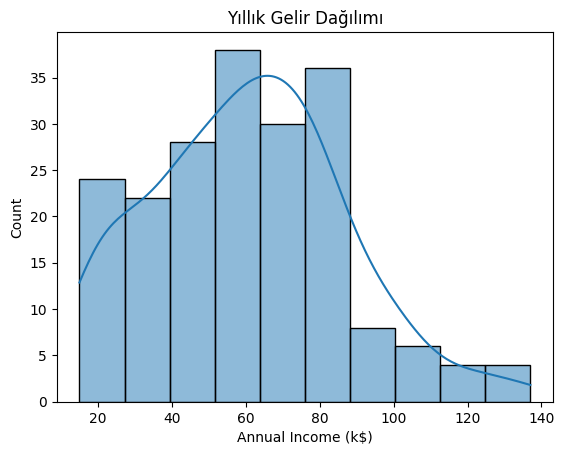

In [ ]:
sns.histplot(df["Annual Income (k$)"], kde=True)
plt.title("Yıllık Gelir Dağılımı")
plt.show()




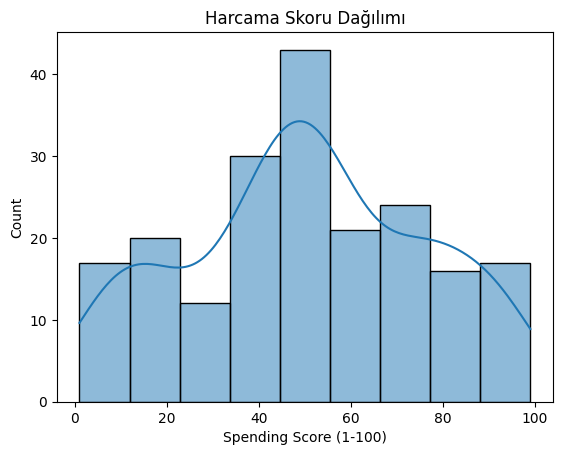

In [ ]:
sns.histplot(df["Spending Score (1-100)"], kde=True)
plt.title("Harcama Skoru Dağılımı")
plt.show()

In [ ]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


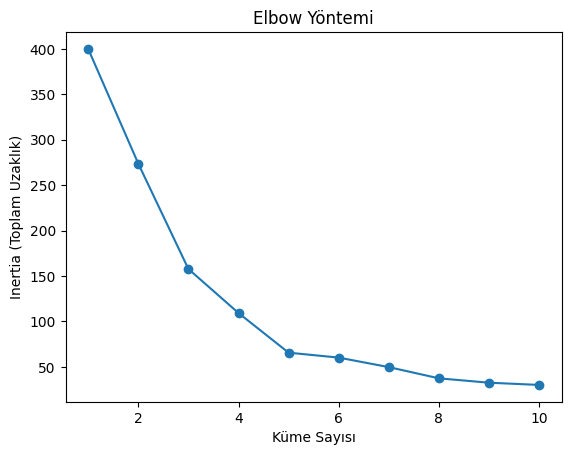

In [ ]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Yöntemi")
plt.xlabel("Küme Sayısı")
plt.ylabel("Inertia (Toplam Uzaklık)")
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)


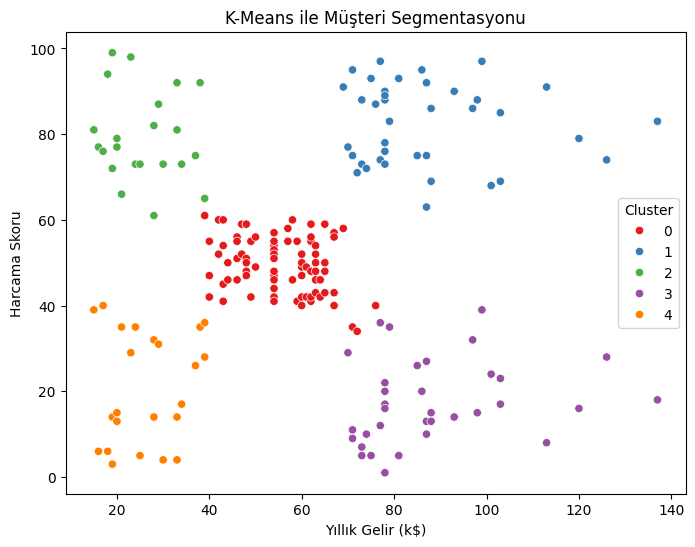

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"],
                hue=df["Cluster"], palette="Set1")
plt.title("K-Means ile Müşteri Segmentasyonu")
plt.xlabel("Yıllık Gelir (k$)")
plt.ylabel("Harcama Skoru")
plt.show()


In [ ]:
df.groupby("Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()


,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


In [ ]:
score = silhouette_score(X_scaled, df["Cluster"])
print(f"Silhouette Skoru: {score:.3f}")

Silhouette Skoru: 0.555


Skor Aralığı | Anlamı
* ~1 | Kümeler çok net ayrılmış, içleri çok sıkı
* 0.5–0.7 | Oldukça iyi, ayrışma yeterli ve kümeler anlamlı
* 0.2–0.5 | Kabul edilebilir ama kümeler biraz karışık
* 0 veya altı | Kötü kümeleme – yanlış grup atamaları var



## 🎯 **Amacın Neydi?**

Amaç:  
Mall Customers veri setindeki müşterileri, **yıllık gelirleri** ve **harcama skorlarına** göre benzer davranışlar sergileyen gruplara (kümelere) ayırmak. Bu segmentasyon sayesinde:
- Pazarlama stratejileri farklı gruplara özel planlanabilir,
- Sadakat kampanyaları veya özel indirimler uygun segmente yönlendirilebilir.

---

## 🧪 **Ne Yaptın?**

1. **Veriyi Seçtin:**  
   - Yalnızca "Annual Income (k$)" ve "Spending Score (1-100)" sütunlarını kullandın.
   - Böylece 2 boyutlu ama anlamlı bir müşteri profili çıkardın.

2. **K-Means Kümeleme Uyguladın:**  
   - `Elbow Yöntemi` ile **K = 5** ideal küme sayısı olarak belirlendi.
   - K-Means ile bu 5 kümeyi oluşturdun.

3. **Her kümenin ortalamasını hesapladın:**
   - Yıllık gelir ve harcama skorlarının ortalamaları küme bazında çıkarıldı.

4. **Silhouette Skoru ile değerlendirdin:**
   - Küme içi tutarlılık ve küme dışı ayrışmayı ölçtün.
   - **Skor: 0.55 → Tatmin edici**, kümeler birbirinden anlamlı derecede ayrılmış.

---

## 📊 **Elde Ettiğin Çıktı:**

### Cluster Özellikleri:

| Küme | Gelir (k$) | Harcama Skoru | Segment Açıklaması |
|------|------------|----------------|---------------------|
| 1    | 86.5       | 82.1           | **Zengin & Harcayan** – VIP müşteriler  
| 3    | 88.2       | 17.1           | **Zengin ama Tutumlu** – İlgisiz ya da sadık olmayan müşteri  
| 2    | 25.7       | 79.3           | **Geliri düşük ama Harcayan** – Potansiyel riskli, sadakat programı için uygun  
| 4    | 26.3       | 20.9           | **Düşük Gelir & Az Harcayan** – Düşük öncelikli grup  
| 0    | 55.3       | 49.5           | **Orta gelir & Orta harcayan** – Stabil müşteri kitlesi  

---

## 🧠 **Yorum:**

- **Başarılı bir segmentasyon yaptın.**  
  Segmentler, hem gelir hem de harcama davranışlarına göre açıkça ayrılıyor.
- **Silhouette Skoru = 0.55**, bu skor genellikle **makul kümelenme** başarısına işaret eder.
- Şimdi bu segmentleri hedefleyerek pazarlama stratejileri belirleyebilirsin.

---

## 🔜 **Bir Sonraki Adım Ne Olabilir?**

- Her küme için **müşteri sayısını ve oranını** hesapla.
- Kümeleri **etiketleyerek** grafik üzerinde adlandır.
- Segmentlere göre özel strateji öner: örneğin "Küme 1’e e-posta kampanyası", "Küme 2’ye taksitli ödeme önerisi" gibi.




## 2️⃣ DBSCAN (Density-Based Spatial Clustering)

### 🔧 **Tanım:**
Yoğunluğa dayalı kümeleme algoritmasıdır. **Yüksek yoğunluklu bölgeleri kümeler**, seyrek noktaları ise **gürültü (noise/anomali)** olarak tanımlar.

### 🔢 Parametreler:
- `eps`: iki nokta arasındaki maksimum mesafe
- `min_samples`: bir noktayı çekirdek nokta (core point) olarak saymak için gerekli komşu sayısı

### ✅ Avantajları:
- Küme sayısını bilmeye gerek yok
- Gürültü verileri ayırabilir
- Karmaşık şekilli kümeleri algılar

### ⚠️ Dezavantajları:
- Parametre ayarları çok hassastır
- Farklı yoğunluklarda kümeler varsa zorlanabilir

### 📌 Kullanım Örneği:
- **make_moons**, **Credit Card Fraud** veri seti

---


**💳 Credit Card Fraud Detection Dataset** (Kredi Kartı Sahtekarlığı Veri Seti), finansal dolandırıcılık tespiti (fraud detection) üzerine çalışan makine öğrenmesi modellerini eğitmek ve test etmek için sıklıkla kullanılan gerçek bir verisettir. Veri, **Avrupa’daki bir banka** tarafından sağlanmıştır ve 2013 yılında yaşanmış **gerçek kredi kartı işlemlerini** içermektedir. Ancak kişisel bilgiler korunmuştur.

---

### 🕵️‍♀️ **Veri Setinin Hikayesi**

Bir banka, müşterilerinin yaptığı **kredi kartı işlemlerinin güvenliğini sağlamak** için, geçmişte yaşanmış işlemleri analiz ederek dolandırıcılık (fraud) örüntülerini tanımaya çalışır. Bu amaçla geçmişteki **284,807 adet kredi kartı işlemi** kayıt altına alınmış ve bu işlemlerden hangilerinin dolandırıcılık olduğu etiketlenmiştir.

Ancak, güvenlik ve gizlilik nedeniyle **müşteri bilgileri anonimleştirilmiştir**. Bu nedenle değişkenlerin çoğu **PCA (Principal Component Analysis)** ile dönüştürülmüş ve isimleri `V1`'den `V28`'e kadar olan sayısal sütunlardan oluşur.

---

### 📦 **Veride Neler Var?**

| Değişken | Açıklama |
|----------|----------|
| `Time` | İlk işlemden itibaren geçen süre (saniye cinsinden) |
| `V1` – `V28` | PCA ile oluşturulmuş anonimleştirilmiş özellikler |
| `Amount` | İşlem tutarı (Avro cinsinden) |
| `Class` | Hedef değişken (0 = Normal işlem, 1 = Dolandırıcılık) ✅

---

### ⚠️ **Veri Setinin Özelliği – Dengesizlik**

Veride **sadece %0.17’si** (492 işlem) dolandırıcılıktır. Bu da onu **dengesiz (imbalanced)** sınıflandırma problemlerinin klasik örneklerinden biri yapar.

Bu nedenle:

- **Precision, Recall, F1-score, ROC-AUC** gibi metrikler önem kazanır.
- **SMOTE**, **Under/Over Sampling**, **Anomaly Detection** gibi yöntemler sıklıkla kullanılır.
- Lojistik regresyon, karar ağaçları, Random Forest, XGBoost, hatta Autoencoder ve GAN gibi derin öğrenme modelleri bu veride denenir.

---

### 🎯 Kullanım Amaçları

- ❌ Sahte işlemleri erkenden tespit etmek  
- 💰 Bankacılık sistemlerinin güvenliğini artırmak  
- ⚖️ Dengesiz sınıflarda doğru tahmin yapabilen modeller geliştirmek  
- 🔍 Anomali tespiti tekniklerini karşılaştırmak

---




In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/KAIRU/Kurumsal/Acun Medya Eğitimi/20.Hafta_denetimsiz_ogrenme/dataset/creditcard.csv")
df["Class"].value_counts()


,count
Class,
0,284315
1,492


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Normal (0) ve Fraud (1) verileri ayıralım
normal = df[df["Class"] == 0].sample(n=2000, random_state=42)
fraud = df[df["Class"] == 1]

# Veri setini birleştir
df_sample = pd.concat([normal, fraud])

df_sample.shape

(2492, 31)

In [ ]:
X = df_sample.drop(["Class", "Time"], axis=1)  # Time kullanmıyoruz

# Ölçekleme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
dbscan = DBSCAN(eps=2, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Küme etiketlerini dataframe'e ekleyelim
df_sample["DBSCAN_Cluster"] = labels


## eps değeri için:
küçük veri setlerinde çok sağlıklı olmayan bu yöntemi büyük veri setlerinde deneyebilirsiniz.

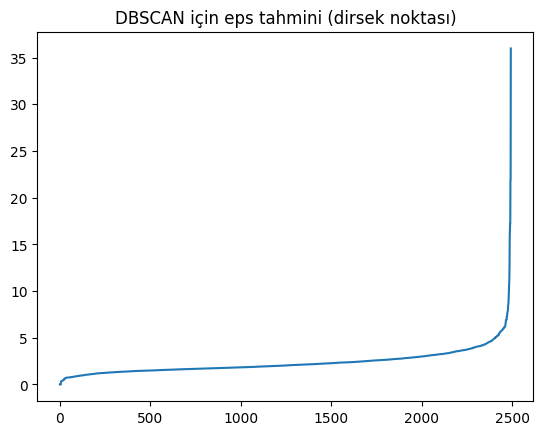

In [ ]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# En yakın komşuluk mesafesini çiz
distances = np.sort(distances[:,4])
plt.plot(distances)
plt.title("DBSCAN için eps tahmini (dirsek noktası)")
plt.show()


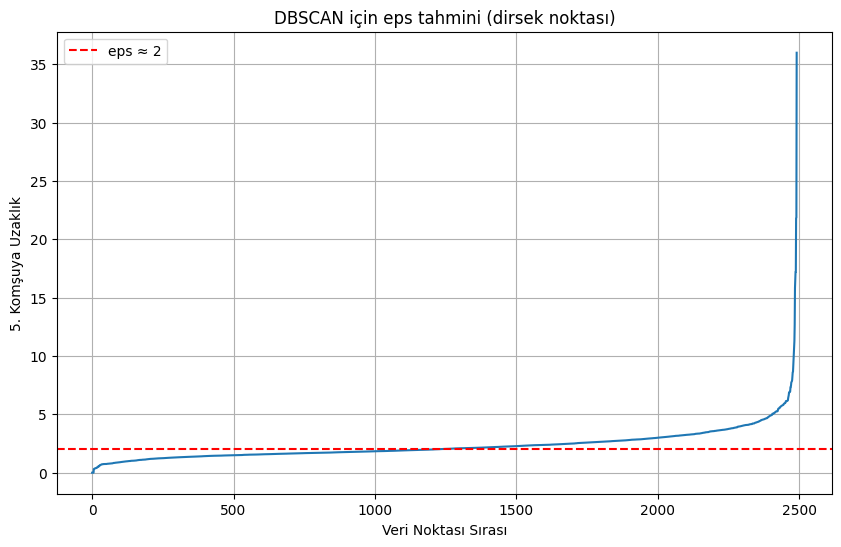

In [ ]:
# eps tahmini çizgisi ile birlikte k-distance plot
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.axhline(y=2, color='r', linestyle='--', label='eps ≈ 2')
plt.title("DBSCAN için eps tahmini (dirsek noktası)")
plt.xlabel("Veri Noktası Sırası")
plt.ylabel("5. Komşuya Uzaklık")
plt.legend()
plt.grid(True)
plt.show()


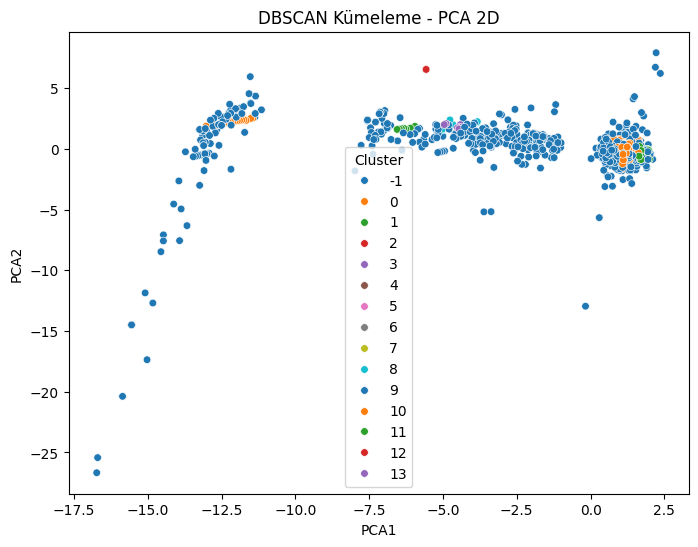

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette="tab10", s=30)
plt.title("DBSCAN Kümeleme - PCA 2D")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Cluster")
plt.show()


In [ ]:
# Küme etiketleri içinde -1 olanlar 'gürültü' yani anomali
print(df_sample["DBSCAN_Cluster"].value_counts())

# Gürültü içinde kaç fraud var?
anomaliler = df_sample[df_sample["DBSCAN_Cluster"] == -1]
print("Gürültüdeki Fraud Sayısı:", anomaliler["Class"].sum())


DBSCAN_Cluster
 0     1295
-1     1030
 1       77
 10      20
 2       11
 5        9
 9        8
 11       7
 8        6
 12       6
 3        6
 13       6
 7        5
 4        3
 6        3
Name: count, dtype: int64
Gürültüdeki Fraud Sayısı: 403


Fraud işlemler, gerçekten de DBSCAN’in yoğunluk dışı (gürültü) olarak tanımladığı bölgelerde yoğunlaşıyor mu?”
sorusuna cevabın: Evet!

In [ ]:
df_sample["Predicted_Fraud"] = (df_sample["DBSCAN_Cluster"] == -1).astype(int)


In [ ]:
df_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,DBSCAN_Cluster,Predicted_Fraud
138028,82450.0,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,...,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,0.76,0,0,0
63099,50554.0,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,...,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,4.18,0,0,0
73411,55125.0,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,...,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,15.00,0,-1,1
164247,116572.0,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,...,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,57.00,0,0,0
148999,90434.0,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,...,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,0.00,0,-1,1


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(df_sample["Class"], df_sample["Predicted_Fraud"]))
print(classification_report(df_sample["Class"], df_sample["Predicted_Fraud"]))


[[1373  627]
 [  89  403]]
              precision    recall  f1-score   support

           0       0.94      0.69      0.79      2000
           1       0.39      0.82      0.53       492

    accuracy                           0.71      2492
   macro avg       0.67      0.75      0.66      2492
weighted avg       0.83      0.71      0.74      2492



# EPS EN İYİ NOKTA BELİRLEME

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import numpy as np

eps_values = np.arange(1.3, 2.2, 0.1)
scores = []

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=5)
    labels = db.fit_predict(X_scaled)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    # En az 2 küme varsa skoru hesapla (outlier olabilir, sorun değil)
    if n_clusters >= 2:
        try:
            score = silhouette_score(X_scaled, labels)
            scores.append((eps, score))
        except:
            continue  # silhouette score hesaplanamazsa geç

# Eğer hiç uygun eps bulunamadıysa kontrol et
if scores:
    best_eps = max(scores, key=lambda x: x[1])[0]
else:
    best_eps = None  # hiçbir eps işe yaramadı

best_eps


np.float64(2.1000000000000005)


### 🎯 **1. “Recall çok iyi ama precision düşükse bu model işe yarar mı?”**

#### ✅ Kısa cevap:
> **Evet, bazı durumlarda işe yarar. Ama bu modelin kullanıldığı bağlama bağlıdır.**

#### 🧠 Açıklama:
- **Recall yüksek:** Gerçek fraud’ların çoğunu tespit ediyoruz (kaçırmıyoruz).
- **Precision düşük:** Ancak, *birçok masum işlem* de "şüpheli" olarak işaretleniyor.

Bu model şu durumda **kullanışlıdır**:
- Gerçek sahte işlem kaçırılmamalı (yüksek güvenlik)
- Yanlış pozitifleri (false alarm) insan kontrolüyle eleyebiliriz (manuel review mümkün)

#### 🎓 Eğitimsel örnek:
> “Modelin amacı sahte işlemleri ilk aşamada tespit edip, sonrasında insan uzmanlara devretmekse, yüksek recall değerlidir. Ancak model doğrudan sistemleri engelliyorsa (otomatik kararlar), düşük precision problem olur.”

---

### 🎯 **2. “Hangi uygulamada recall yüksek olması tercih edilir?”**

#### ✅ Uygulamalar:

| Uygulama                          | Neden Recall Önemli?                                      |
|----------------------------------|------------------------------------------------------------|
| **Dolandırıcılık tespiti**        | Bir tane bile fraud atlanmamalı → müşteri zararı büyük     |
| **Hastalık teşhisi (kanser vb.)**| Yanlış negatif ölümcül olabilir, fazla pozitif kabul edilir|
| **Siber saldırı analizi**        | Güvenlik açığı kaçırmak daha tehlikeli                     |
| **Arama-kurtarma sistemleri**     | Kaybolan kişi/sinyal kaçırılmamalı                         |

#### 🎓 Eğitimde örnek sorular:
> “Meme kanseri taramasında kaç kadına yanlışlıkla pozitif demek mi daha kötü, yoksa bir kişiyi kaçırmak mı?”  
> “Bir banka sahte işlem kaçırırsa mı riskli, yoksa birkaç kişiye fazladan SMS atarsa mı?”

---

### 🎯 **3. “Gerçek hayatta bu kadar çok false alarm neye yol açar?”**

#### ❌ Sonuçları:

| Etki Alanı           | Sonuç                                          |
|----------------------|-------------------------------------------------|
| **Kullanıcı deneyimi** | Gerçek müşteri yanlış alarmla rahatsız olur (güven kaybı) |
| **Maliyet**          | Her alarm manuel incelenirse, operasyonel yük artar |
| **İtibar kaybı**     | Sürekli "şüpheli işlem" uyarısı → kullanıcı kaçışı |
| **Verimsizlik**      | Analist ekibi zamanını gerçek fraud yerine "gürültüye" harcar |

#### 🎯 Özetle:
> “Çok sayıda yanlış alarm, sistemi kullanılmaz hale getirebilir. Hem müşteri kaybı olur hem de operasyonel yük patlar.”

---

## ✅ Özet Cevaplar:

| Soru | Cevap |
|------|-------|
| Recall yüksek, precision düşükse işe yarar mı? | Evet ama bağlama göre. Ön tarama sistemlerinde kullanılabilir. |
| Hangi uygulamada recall önemli? | Sağlık, güvenlik, finansal fraud gibi **riskin büyük olduğu** alanlarda |
| Çok fazla false alarm neye yol açar? | Kullanıcı memnuniyetsizliği, yüksek maliyet, yanlış kararlar |




##  3️⃣  Isolation Forest

### 🔧 **Tanım:**
Aykırı değerleri, onları diğerlerinden **daha hızlı izole eden** ağaç yapılarına dayanarak tespit eder.

### 🔢 Çalışma prensibi:
- Rastgele veri alt kümeleri seçilir
- Ağaçlar oluşturularak veriler “bölünür”
- Aykırı veriler daha kısa yollarla izole edilir

### ✅ Avantajları:
- Hızlı ve etkili
- Büyük veri setlerinde çalışır
- Yüksek boyutlu verilerle uyumlu

### ⚠️ Dezavantajları:
- Sadece anomali tespiti için uygundur
- Kümeleme yapmaz

### 📌 Kullanım Örneği:
- **Credit Card Fraud**, **KDD Cup'99**

---

## 🧾 Özet Tablosu

| Algoritma          | Alan                | Avantajı                               | Uygun Veri Setleri             |
|--------------------|---------------------|-----------------------------------------|--------------------------------|
| K-Means            | Kümeleme            | Hızlı, kolay                             | Mall Customers, Iris           |
| DBSCAN             | Kümeleme & Anomali  | Gürültü ayırabilir, şekil duyarsız      | make_moons, Fraud Dataset      |
| Hierarchical       | Kümeleme            | Dendrogram ile analiz                   | Iris, Wine                     |
| PCA                | Boyut indirgeme     | Varyansı korur, görselleştirme sağlar   | Digits, Wine                   |
| t-SNE              | Görselleştirme      | Karmaşık yapılar 2D/3D’de net görünür   | MNIST, Fashion MNIST           |
| Isolation Forest   | Anomali tespiti     | Büyük veriyle hızlı çalışır             | Fraud Dataset, KDD Cup’99      |

---


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/KAIRU/Kurumsal/Acun Medya Eğitimi/20.Hafta_denetimsiz_ogrenme/dataset/creditcard.csv")


In [ ]:
print(df["Class"].value_counts())


Class
0    284315
1       492
Name: count, dtype: int64


In [ ]:
# Normal veriden 2000 örnek, fraud'un hepsi
normal = df[df["Class"] == 0].sample(2000, random_state=42)
fraud = df[df["Class"] == 1]

df_sample = pd.concat([normal, fraud])
X = df_sample.drop(["Class", "Time"], axis=1)
y = df_sample["Class"]


Bu kod bloğu, **Credit Card Fraud Detection** veri setini **anlamlı ve yönetilebilir** bir hale getirmek için yapılan **ön hazırlık (örnekleme ve ayrıştırma)** adımıdır. Aşağıda satır satır açıklayayım 👇



## 🔍 **Satır Satır Açıklama**

---

### ✅ 1️⃣ `normal = df[df["Class"] == 0].sample(2000, random_state=42)`

> 🔹 Tüm **normal (gerçek işlem)** verilerinden rastgele 2000 örnek seçiyoruz.  
**Neden?**
- Veri çok büyük (284.000+ işlem)
- Fraud oranı çok düşük (492 örnek)
- Tüm veriyi işlemek hem yavaş hem de dengesizlik nedeniyle modeller bozulur
- **Daha dengeli ve hesaplı bir örnekleme** ile algoritmaları daha verimli test edebilirsin

---

### ✅ 2️⃣ `fraud = df[df["Class"] == 1]`

> 🔹 Tüm **fraud (sahte işlem)** verilerini alıyoruz.  
**Neden?**
- Fraud sayısı zaten az (492 adet)
- Hepsini tutmak önemli çünkü modelin bunları ne kadar yakalayabildiğini ölçmek istiyoruz

---

### ✅ 3️⃣ `df_sample = pd.concat([normal, fraud])`

> 🔹 Normal ve fraud örnekleri birleştirilerek yeni bir veri seti oluşturuluyor  
**Toplam veri sayısı:**  
→ 2000 (normal) + 492 (fraud) = **2492 örnek**

---

### ✅ 4️⃣ `X = df_sample.drop(["Class", "Time"], axis=1)`

> 🔹 Özellik (feature) verisini hazırlıyoruz:
- `Class`: hedef değişken → çıkarılıyor
- `Time`: genellikle PCA dönüşümünden etkilenmiş olduğundan çıkarılır ya da anlamlı değilse analiz dışında bırakılır

---

### ✅ 5️⃣ `y = df_sample["Class"]`

> 🔹 Hedef değişken yani **gerçek etiketler** burada tutulur  
- `y` daha sonra model performansını değerlendirmek için (confusion matrix, precision, recall vs.) kullanılacak

---

## 🎯 **Neden Bu İşlemi Yapıyorsun?**

| Amaç                              | Açıklama |
|-----------------------------------|----------|
| ✅ Modeli daha hızlı çalıştırmak   | Tüm veriyi işlemek uzun sürer, eğitim süresi uzar |
| ✅ Dengeli analiz ortamı yaratmak | Aşırı dengesiz veri, denetimsiz algoritmaların çıktısını çarpıtabilir |
| ✅ Değerlendirme yapabilmek       | Sınıf etiketleri (`y`) ayrı tutuldu → model çıktılarıyla kıyas yapılabilecek |
| ✅ Fraud tespiti için mantıklı senaryo kurmak | 2000 gerçek işlem içinde 492 fraud var → gerçek hayata benzer bir senaryo yaratır |



In [ ]:
iso = IsolationForest(contamination=len(fraud)/len(df_sample), random_state=42)
df_sample["Predicted"] = iso.fit_predict(X_scaled)


In [ ]:
df_sample["Predicted"] = df_sample["Predicted"].apply(lambda x: 1 if x == -1 else 0)


In [ ]:
print(confusion_matrix(y, df_sample["Predicted"]))
print(classification_report(y, df_sample["Predicted"]))


[[1863  137]
 [ 137  355]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2000
           1       0.72      0.72      0.72       492

    accuracy                           0.89      2492
   macro avg       0.83      0.83      0.83      2492
weighted avg       0.89      0.89      0.89      2492




##4️⃣ Hierarchical Clustering (Agglomerative)

### 🔧 **Tanım:**
Veri noktalarını **hiyerarşik olarak birleştiren** bir algoritmadır. Başta her nokta bir küme olarak kabul edilir ve benzer kümeler kademeli olarak birleştirilir.

### 🔢 Yöntem:
- **Agglomerative (Alt-birleştirici)**: Aşağıdan yukarı
- **Divisive (Üstten ayırıcı)**: Yukarıdan aşağı

### 📈 Dendrogram:
- Küme yapısını görsel olarak gösterir
- Kırılma noktası seçilerek küme sayısı belirlenir

### ✅ Avantajları:
- Küme sayısını başta bilmek gerekmez
- Anlamlı görselleştirme sağlar

### ⚠️ Dezavantajları:
- Büyük veri setlerinde yavaştır
- Gürültü verilerden etkilenebilir

### 📌 Kullanım Örneği:
- **Iris**, **Wine** veri setleri

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


In [ ]:
# 6 veri noktası (2 boyutlu)
X = np.array([
    [1, 2],
    [2, 1],
    [3, 2],
    [8, 7],
    [8, 8],
    [7, 8]
])


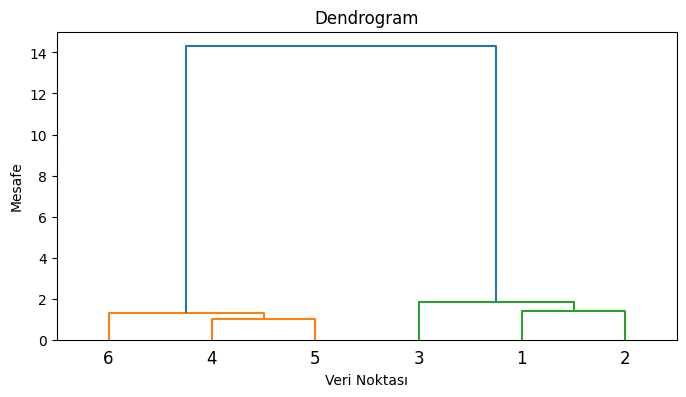

In [ ]:
linked = linkage(X, method='ward')

plt.figure(figsize=(8, 4))
dendrogram(linked, labels=np.arange(1, 7))
plt.title("Dendrogram")
plt.xlabel("Veri Noktası")
plt.ylabel("Mesafe")
plt.show()


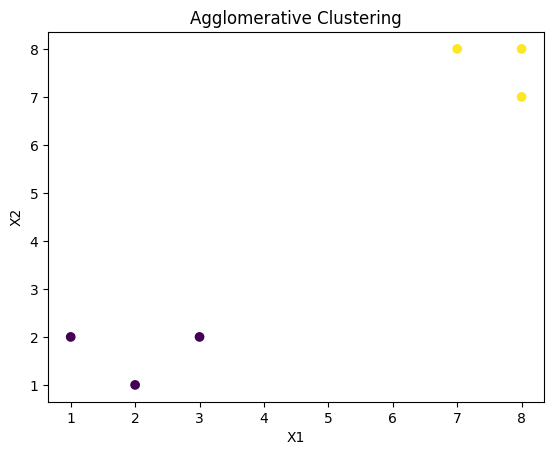

In [ ]:
model = AgglomerativeClustering(n_clusters=2)
labels = model.fit_predict(X)

# Küme sonuçlarını görselleştir
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Agglomerative Clustering")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()



##  5️⃣PCA (Principal Component Analysis)

### 🔧 **Tanım:**
Yüksek boyutlu verileri, en fazla bilgiyi (varyansı) koruyacak şekilde daha düşük boyutlara indirger.

### 🔢 Temel fikir:
- Yeni eksenler (principal components) tanımlar
- İlk birkaç eksen, toplam varyansın büyük kısmını temsil eder

### ✅ Avantajları:
- Görselleştirme (2D, 3D)
- Gürültü azaltma
- Daha az boyutla daha hızlı modelleme

### ⚠️ Dezavantajları:
- Lineer ilişkileri yakalar
- Özellikler yorumlanması zor hale gelebilir

### 📌 Kullanım Örneği:
- **Wine** ve **Digits** veri setleri

---



### 📚 Hikâyesi

**Kaynak:**
Wine dataset, 1991 yılında **Forina et al.** tarafından yayınlanan bir kimya çalışmasına dayanmaktadır.
Araştırmanın amacı, **üç farklı İtalyan şarap bölgesinden gelen şarapların kimyasal analizlerini kullanarak** bunları sınıflandırmaktı.

**Orijinal çalışma başlığı:**

> *"Chemical analysis of wines grown in the same region in Italy but derived from three different cultivars."*

Yani, **aynı bölgede yetişen ama farklı üzüm türlerinden yapılan şarapların** kimyasal farklılıkları analiz edilmiştir.

---

### 📦 Veri Setinin İçeriği

* **Örnek sayısı:** 178 şarap

* **Sınıf sayısı:** 3 farklı şarap türü
  (Class\_0, Class\_1, Class\_2 olarak etiketlenmiş)

* **Özellik sayısı:** 13 adet kimyasal özellik

| Özellik Adı                  | Açıklama                                |
| ---------------------------- | --------------------------------------- |
| Alcohol                      | Alkol oranı                             |
| Malic acid                   | Malik asit                              |
| Ash                          | Kül miktarı                             |
| Alcalinity of ash            | Kül alkalinitesi                        |
| Magnesium                    | Magnezyum                               |
| Total phenols                | Toplam fenol miktarı                    |
| Flavanoids                   | Flavonoid seviyesi                      |
| Nonflavanoid phenols         | Flavonoid olmayan fenoller              |
| Proanthocyanins              | Proantosiyanidin seviyesi               |
| Color intensity              | Renk yoğunluğu                          |
| Hue                          | Ton (renk tonlaması)                    |
| OD280/OD315 of diluted wines | Seyreltilmiş şarabın ışık soğurma oranı |
| Proline                      | Prolin (bir aminoasit) düzeyi           |

---

### 🎯 Neden Popüler?

* **Kolay anlaşılır ve dengeli**: 3 sınıf ve 13 özellik ile oldukça uygun bir boyutta.
* **Kimyasal verilerle çalışmak**: Sayısal ve ölçülebilir değerler içerir.
* **Model denemeleri için ideal**: Lojistik regresyon, SVM, KNN, Naive Bayes, PCA vb. tekniklerin denenmesi için kullanılır.
* **PCA uygulaması için çok elverişli**: Yüksek boyutları görselleştirerek analiz etmeye olanak tanır.

---

### 🧪 Nasıl Yüklenir?

```python
from sklearn.datasets import load_wine
data = load_wine()
X = data.data
y = data.target
```

---

### 🧠 Örnek Kullanım Alanları

* Sınıflandırma modeli eğitmek
* PCA ile boyut indirip görselleştirmek
* Özellik mühendisliği pratiği yapmak
* Normalizasyon ve ölçekleme tekniklerini test etmek

---


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [ ]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name="Target")


In [ ]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


PCA, verideki örüntüleri (desenleri) etiketlere bakmadan bulur.
Etiketleri sadece biz sonucu yorumlamak için görselleştirmeye dahil ettik.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Target"] = y


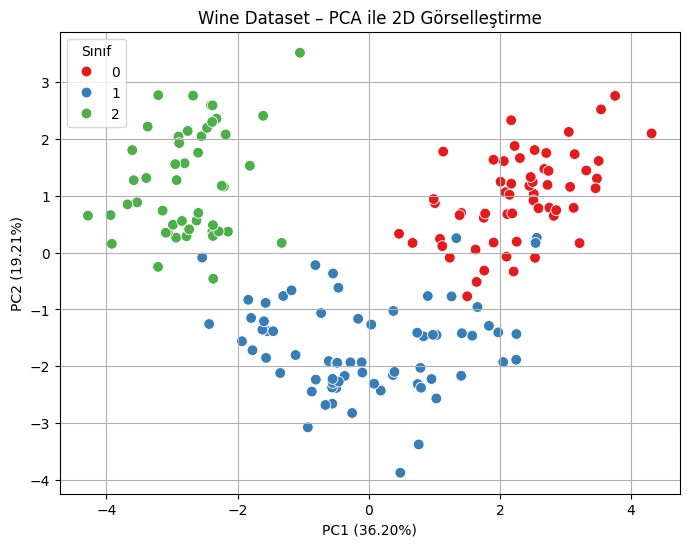

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Target", palette="Set1", s=60)
plt.title("Wine Dataset – PCA ile 2D Görselleştirme")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
plt.legend(title="Sınıf")
plt.grid(True)
plt.show()


In [ ]:
explained_var = pca.explained_variance_ratio_
print(f"PC1 Varyans Oranı: {explained_var[0]:.4f}")
print(f"PC2 Varyans Oranı: {explained_var[1]:.4f}")
print(f"Toplam: {explained_var[:2].sum():.4f}")


PC1 Varyans Oranı: 0.3620
PC2 Varyans Oranı: 0.1921
Toplam: 0.5541



## 📊 PCA Sonuçlarının Anlaşılır Açıklaması

### ✅ **PC1 Varyans Oranı: 0.3620 (≈ %36.2)**  
> PCA bize diyor ki:  
**"13 özellik içeren bu veri setindeki bilginin %36’sını, sadece 1 yeni bileşenle (PC1) temsil edebilirim."**

Yani:
- PC1, veri içindeki **en önemli yönü** temsil eder.
- Eğer sadece tek boyutla çalışmak zorunda olsaydık, **PC1 en doğru seçim olurdu**.

---

### ✅ **PC2 Varyans Oranı: 0.1921 (≈ %19.2)**  
> PCA:  
**"Verideki ikinci en büyük bilgi kaynağını da PC2 yakalıyor. Bu bileşen %19’luk bilgi taşıyor."**

Yani:
- PC2, PC1'e dik başka bir eksen üzerinden farklı varyansı yakalıyor.
- İkisi birlikte daha **derin ayrım gücü** sağlıyor.

---

### ✅ **Toplam: 0.5541 (≈ %55.4)**  
> “PC1 ve PC2 birlikte verinin toplam **%55’ini açıklıyor**.”

Yani:
- 13 boyuttan sadece 2’siyle, veri setindeki bilginin **yarıdan fazlasını** korumuş olduk.
- Bu sayede hem görselleştirme yapabiliyoruz hem de anlamlı analizler sürdürülebilir.

---



> ❝ PCA bize "bu veri setini 2 boyuta indirirseniz, bilgilerin %55’ini hala elinizde tutuyorsunuz" demiş oluyor. Bu da görselleştirme ve özetleme için oldukça güçlü bir orandır. ❞


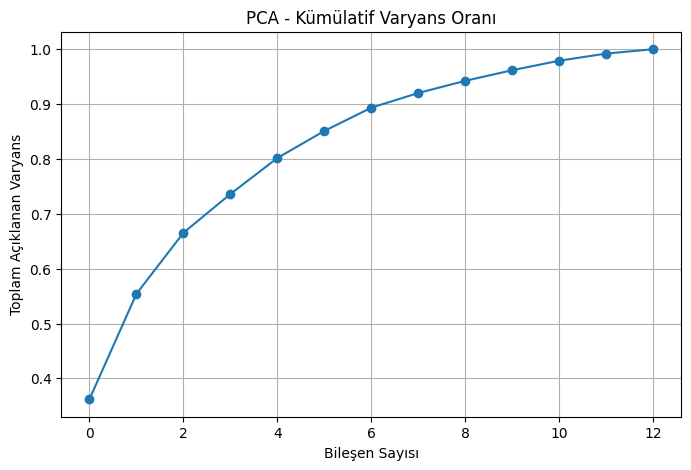

In [ ]:
pca_full = PCA().fit(X_scaled)
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.title("PCA - Kümülatif Varyans Oranı")
plt.xlabel("Bileşen Sayısı")
plt.ylabel("Toplam Açıklanan Varyans")
plt.grid(True)
plt.show()


Yüksek boyutlu bir veriyle çalışırken, ilk adım onu anlamaktır.
PCA sayesinde veriyi hem daha az boyutta temsil ettik, hem de görsel olarak ‘hangi sınıf hangi özelliklerle ayrışıyor?’ sorusuna daha yakından bakabildik.


## 6. t-SNE (t-Distributed Stochastic Neighbor Embedding)

### 🔧 **Tanım:**
Yüksek boyutlu verileri 2D/3D'ye indirerek **benzer noktaların yakın, farklıların uzak olmasını** sağlar.

### 🔢 Özellikleri:
- t dağılımı ile uzak noktalar arasındaki farkları vurgular
- Özellikle **görselleştirme için tasarlanmıştır**

### ✅ Avantajları:
- Karmaşık kümeleri 2D'de net gösterir
- Görsel keşif ve analizde güçlüdür

### ⚠️ Dezavantajları:
- Yavaş çalışır
- Her çalıştırmada farklı sonuç (stokastik)
- Yeni verileri modele dahil etmek zordur

### 📌 Kullanım Örneği:
- **MNIST**, **Fashion MNIST**

---



### 📊 **Denetimsiz Öğrenme Algoritmalarında Ölçekleme Gereksinimi**

| Algoritma                   | Ölçekleme Gerekir mi? | Açıklama |
|-----------------------------|------------------------|----------|
| **K-Means**                 | ✅ Evet                | Euclidean mesafe kullanır; büyük ölçekli özellikler algoritmayı etkiler. |
| **DBSCAN**                  | ✅ Evet                | Yoğunluk ve komşuluk mesafesi temellidir; tüm özelliklerin aynı katkıyı yapması gerekir. |
| **Hierarchical Clustering** | ✅ Genellikle          | Distance-based (ör. Euclidean) ise gereklidir; özellikle görsel ayrımlar için önerilir. |
| **PCA (Principal Component Analysis)** | ✅ Evet     | Varyans hesaplar; büyük ölçekli değişkenler tüm varyansı domine eder. |
| **t-SNE / UMAP**            | ✅ Evet                | Özellik yakınlıklarını anlamlı yorumlayabilmek için normalizasyon gerekir. |
| **Isolation Forest**        | ❌ Gerekmez            | Ağaç tabanlıdır; özelliğin dağılımı ve sıralaması önemli, ölçek önemli değil. |


# ÖDEV **UNSW-NB15 Veri Seti**



## 📚 **UNSW-NB15 Veri Setinin Hikayesi**

---

### 🧠 **Amaç:**

Günümüzde ağ sistemleri; bankacılıktan eğitime, sağlıktan devlet kurumlarına kadar her alanda kritik görevler üstlenmektedir. Ancak bu sistemler, siber saldırılara her zamankinden daha açık hale gelmiştir. Bu nedenle **saldırı tespiti (Intrusion Detection)** konusu, siber güvenliğin en önemli bileşenlerinden biri haline gelmiştir.

UNSW-NB15 veri seti, bu bağlamda araştırmacıların ve geliştiricilerin **gerçek dünyaya yakın ağ trafiği üzerinde saldırı tespit algoritmaları geliştirebilmesi** için oluşturulmuştur.

---

### 🏛️ **Kim Tarafından Oluşturuldu?**

- Veri seti, **Avustralya'daki University of New South Wales (UNSW)** bünyesinde geliştirilen **Cyber Range Lab** tarafından üretilmiştir.
- Veri üretimi için **IXIA PerfectStorm simülatörü** kullanılmıştır.
- Veri seti, 2015 yılında oluşturulmuştur ve günümüzde hala akademik yayınlarda sıklıkla kullanılmaktadır.

---

### 🌐 **Veri Nasıl Toplandı?**

1. **Gerçekçi ağ trafiği** oluşturmak amacıyla, hem normal kullanıcı davranışları hem de siber saldırılar simüle edilmiştir.
2. Simülasyonlar, farklı gün ve saatlerde çalıştırılarak **çeşitli zaman dilimlerine** yayılmış veri oluşturulmuştur.
3. Ağ trafiği verileri, hem **normal bağlantılar** hem de **9 farklı saldırı türü** içerecek şekilde toplanmıştır.

---

### 🚨 **İçerdiği Saldırı Türleri:**

1. **Fuzzers**  
2. **Analysis**  
3. **Backdoors**  
4. **DoS (Denial of Service)**  
5. **Exploits**  
6. **Generic**  
7. **Reconnaissance (Bilgi Toplama)**  
8. **Shellcode**  
9. **Worms**

> Bu çeşitlilik, veri setini hem **denetimli** hem de **denetimsiz öğrenme** teknikleriyle çalışmaya uygun hale getirir.

---

### 📊 **Veri Özellikleri:**

| Özellik                    | Açıklama |
|----------------------------|----------|
| Toplam örnek sayısı        | 2,540,044 |
| Etiketli veri              | Evet (`label`: 0 = normal, 1 = attack) |
| Kategorik + sayısal sütunlar | Protokol, servis, bayt sayıları, zaman bilgileri, bağlantı süreleri, yönlendirme özellikleri |
| Dosya yapısı               | Training ve Testing setleri ayrı olarak sağlanır |

---

### 🎯 **Eğitimde Kullanım Amacı:**

Bu veri seti, öğrencilerin:
- **Gerçek dünya problemlerini simüle edebilmeleri**
- **Saldırı tespiti ve siber güvenlik farkındalığı kazanabilmeleri**
- **Anomali tespiti, sınıflandırma ve kümeleme algoritmalarını uygulayabilmeleri** için çok uygundur.

Ayrıca verideki dengesizlik, **fraud detection** gibi alanlara da benzerlik gösterdiğinden makine öğrenmesi modelleme becerilerini gerçekçi senaryolarda geliştirmek için kullanılabilir.

---



> ❝ UNSW-NB15, günümüz siber güvenlik dünyasında makine öğrenmesinin nasıl kullanılabileceğini gösteren, gerçek dünya ile güçlü bağı olan, zengin ve çok boyutlu bir veri setidir. ❞





### 🔍 Neden bu veri seti uygun?

| Özellik | Açıklama |
|---------|----------|
| 🔹 Etiketli veri | “normal” ve “attack” olarak ayrılmış — değerlendirme yapılabilir |
| 🔹 Anomali tespiti senaryosu | Siber güvenlik temalı: saldırı = anomali |
| 🔹 Hem sayısal hem kategorik veriler | Preprocessing uygulamaları öğretir |
| 🔹 Büyük ama örneklenebilir | 2000 normal + 500 attack örneğiyle işlenebilir |
| 🔹 Gerçek dünya problemi | Öğrencilerin ilgisini çeker (firewall, IDS gibi kavramlarla eşleştirilebilir)

---
**Konu:** Denetimsiz Öğrenme ile Ağ Tabanlı Saldırı Tespiti: DBSCAN ve Isolation Forest Karşılaştırması

---

### 🎯 Amaç:
Veri setindeki “normal” ve “attack” etiketlerini kullanmadan, denetimsiz yöntemlerle siber saldırıların **anomaliler olarak** tespit edilip edilemeyeceğini test etmek.

---

### ✅ Adımlar:

1. **Veri Hazırlığı**
   - UNSW-NB15 veri setini indir
   - Sadece sayısal sütunları al (veya kategorik verileri dönüştürme)
   - `normal` örneklerden 2000, `attack` örneklerden 500 örnek seç

2. **Ön İşleme**
   - Gerekirse eksik verileri temizle
   - Özellikleri ölçekle (StandardScaler kullan)

3. **DBSCAN Uygulaması**
   - eps ve min_samples ayarlarını dene
   - PCA ile görselleştir
   - Etiketlerle karşılaştır (confusion matrix, precision-recall)

4. **Isolation Forest Uygulaması**
   - contamination oranını ayarla-BONUS-isteeğ bağlı
   #model = IsolationForest(contamination=0.05)
   - Aynı veri setine uygula
   - Yine etiketlerle karşılaştır

5. **Karşılaştırma**
   - Hangi yöntem daha az hata verdi?
   - Hangi yöntem daha fazla saldırı tespit etti?
   - Precision, Recall ve F1-score üzerinden değerlendir

6. **Sonuç Yorumlama**
   - Hangi modelin hangi senaryoda daha işe yarayabileceğini yazılı olarak tartış

